In [1]:
import ROOT
from ROOT import TFile, TCanvas, TPad, TChain, TLegend
from ROOT import kGreen, kBlue, kRed, kBlack, kOrange, kGreen, kCyan, kMagenta, kAzure
from ROOT import TH1D, TVector3, TLorentzVector, TGraph, TMath, TFeldmanCousins
from functions.loadRDataFrame import RDF_to_pandas

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import time

Welcome to JupyROOT 6.26/06


In [2]:
ROOT.EnableImplicitMT(40)

treename = "b"
#mydir1 = "/home/belle2/jcorrea/invisible_search/ntuples/K_J0/signals/"
#mydir2 = "/home/belle2/jcorrea/invisible_search/ntuples/K_J0/merged/"
mydir1 = "/hsm/belle2/bdata/users/jcorrea/invisible_search/ntuples/K/signal/"
mydir2 = "/hsm/belle2/bdata/users/jcorrea/invisible_search/ntuples/K/irreducible/"


# Bsig->pi+X  Btag->pi+D0 (D0->piK) 
HadronicTag_m00 = mydir1+"J0_m0.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m10 = mydir1+"J0_m1.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m20 = mydir1+"J0_m2.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m30 = mydir1+"J0_m3.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m40 = mydir1+"J0_m4.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m45 = mydir1+"J0_m4.5/ntuple_HadronicTag_D_*.root"

# Bsig->pi+X  Btag->pi+D0* (D0*->D0+gamma (D0->K+pi)) 
HadronicTag_m00_Dstar_gamma = mydir1+"J0_m0.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m10_Dstar_gamma = mydir1+"J0_m1.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m20_Dstar_gamma = mydir1+"J0_m2.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m30_Dstar_gamma = mydir1+"J0_m3.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m40_Dstar_gamma = mydir1+"J0_m4.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m45_Dstar_gamma = mydir1+"J0_m4.5/ntuple_HadronicTag_Dstar_gamma_*.root"

# Bsig->pi+X  Btag->pi+D0* (D0*->D0+pi0 (D0->K+pi)) 
HadronicTag_m00_Dstar_pi0 = mydir1+"J0_m0.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m10_Dstar_pi0 = mydir1+"J0_m1.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m20_Dstar_pi0 = mydir1+"J0_m2.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m30_Dstar_pi0 = mydir1+"J0_m3.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m40_Dstar_pi0 = mydir1+"J0_m4.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m45_Dstar_pi0 = mydir1+"J0_m4.5/ntuple_HadronicTag_Dstar_pi0_*.root"



# Bsig->pi+X  Btag->l+nu+D0 (D0->pi+K)
SemilepTag_m00 = mydir1+"J0_m0.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m10 = mydir1+"J0_m1.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m20 = mydir1+"J0_m2.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m30 = mydir1+"J0_m3.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m40 = mydir1+"J0_m4.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m45 = mydir1+"J0_m4.5/ntuple_SemilepTag_D_*.root"

# Bsig->pi+X  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
SemilepTag_m00_Dstar_gamma = mydir1+"J0_m0.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m10_Dstar_gamma = mydir1+"J0_m1.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m20_Dstar_gamma = mydir1+"J0_m2.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m30_Dstar_gamma = mydir1+"J0_m3.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m40_Dstar_gamma = mydir1+"J0_m4.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m45_Dstar_gamma = mydir1+"J0_m4.5/ntuple_SemilepTag_Dstar_gamma_*.root"

# Bsig->pi+X  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
SemilepTag_m00_Dstar_pi0 = mydir1+"J0_m0.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m10_Dstar_pi0 = mydir1+"J0_m1.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m20_Dstar_pi0 = mydir1+"J0_m2.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m30_Dstar_pi0 = mydir1+"J0_m3.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m40_Dstar_pi0 = mydir1+"J0_m4.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m45_Dstar_pi0 = mydir1+"J0_m4.5/ntuple_SemilepTag_Dstar_pi0_*.root"


# Bsig->bkg_charged  Btag->l+nu+D0 (D0->pi+K)
Kcharged_SemilepTag = mydir2+"K_chargedFinal/ntuple_SemilepTag_D_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
Kcharged_SemilepTag_Dstar_gamma = mydir2+"K_chargedFinal/ntuple_SemilepTag_Dstar_gamma_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
Kcharged_SemilepTag_Dstar_pi0 = mydir2+"K_chargedFinal/ntuple_SemilepTag_Dstar_pi0_Full.root"


# Bsig->bkg_charged  Btag->l+nu+D0 (D0->pi+K)
Kcharged_HadronicTag = mydir2+"K_chargedFinal/ntuple_HadronicTag_D_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
Kcharged_HadronicTag_Dstar_gamma = mydir2+"K_chargedFinal/ntuple_HadronicTag_Dstar_gamma_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
Kcharged_HadronicTag_Dstar_pi0 = mydir2+"K_chargedFinal/ntuple_HadronicTag_Dstar_pi0_Full.root"


#topoana semilep tag
topoana_SemilepTagD = mydir2+"K_chargedFinal/topoana.root"



# Signal Dataframe
df_HadronicTag_m00 = ROOT.RDataFrame(treename, HadronicTag_m00)
df_HadronicTag_m10 = ROOT.RDataFrame(treename, HadronicTag_m10)
df_HadronicTag_m20 = ROOT.RDataFrame(treename, HadronicTag_m20)
df_HadronicTag_m30 = ROOT.RDataFrame(treename, HadronicTag_m30)
df_HadronicTag_m40 = ROOT.RDataFrame(treename, HadronicTag_m40)
df_HadronicTag_m45 = ROOT.RDataFrame(treename, HadronicTag_m45)

df_HadronicTag_m00_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m00_Dstar_gamma)
df_HadronicTag_m10_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m10_Dstar_gamma)
df_HadronicTag_m20_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m20_Dstar_gamma)
df_HadronicTag_m30_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m30_Dstar_gamma)
df_HadronicTag_m40_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m40_Dstar_gamma)
df_HadronicTag_m45_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m45_Dstar_gamma)

df_HadronicTag_m00_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m00_Dstar_pi0)
df_HadronicTag_m10_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m10_Dstar_pi0)
df_HadronicTag_m20_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m20_Dstar_pi0)
df_HadronicTag_m30_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m30_Dstar_pi0)
df_HadronicTag_m40_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m40_Dstar_pi0)
df_HadronicTag_m45_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m45_Dstar_pi0)

df_SemilepTag_m00 = ROOT.RDataFrame(treename, SemilepTag_m00)
df_SemilepTag_m10 = ROOT.RDataFrame(treename, SemilepTag_m10)
df_SemilepTag_m20 = ROOT.RDataFrame(treename, SemilepTag_m20)
df_SemilepTag_m30 = ROOT.RDataFrame(treename, SemilepTag_m30)
df_SemilepTag_m40 = ROOT.RDataFrame(treename, SemilepTag_m40)
df_SemilepTag_m45 = ROOT.RDataFrame(treename, SemilepTag_m45)

df_SemilepTag_m00_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m00_Dstar_gamma)
df_SemilepTag_m10_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m10_Dstar_gamma)
df_SemilepTag_m20_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m20_Dstar_gamma)
df_SemilepTag_m30_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m30_Dstar_gamma)
df_SemilepTag_m40_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m40_Dstar_gamma)
df_SemilepTag_m45_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m45_Dstar_gamma)

df_SemilepTag_m00_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m00_Dstar_pi0)
df_SemilepTag_m10_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m10_Dstar_pi0)
df_SemilepTag_m20_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m20_Dstar_pi0)
df_SemilepTag_m30_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m30_Dstar_pi0)
df_SemilepTag_m40_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m40_Dstar_pi0)
df_SemilepTag_m45_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m45_Dstar_pi0)



# BKG RDataframe semilep
df_K_charged_SemilepTag = ROOT.RDataFrame(treename, Kcharged_SemilepTag)
df_K_charged_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, Kcharged_SemilepTag_Dstar_gamma)
df_K_charged_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, Kcharged_SemilepTag_Dstar_pi0)


# BKG RDataframe Hadronic
df_K_charged_HadronicTag = ROOT.RDataFrame(treename, Kcharged_HadronicTag)
df_K_charged_HadronicTag_Dstar_gamma = ROOT.RDataFrame(treename, Kcharged_HadronicTag_Dstar_gamma)
df_K_charged_HadronicTag_Dstar_pi0 = ROOT.RDataFrame(treename, Kcharged_HadronicTag_Dstar_pi0)


#topoana

'''
bkg_names_1 = ROOT.std.vector('string')()
for n in [Kcharged_SemilepTag, Kmixed_SemilepTag]: bkg_names_1.push_back(n)
df_bkg_SemilepTag = ROOT.RDataFrame(treename, bkg_names_1)


bkg_names_2 = ROOT.std.vector('string')()
for n in [Kcharged_SemilepTag_Dstar_gamma, Kmixed_SemilepTag_Dstar_gamma]: bkg_names_2.push_back(n)
df_bkg_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, bkg_names_2)


bkg_names_3 = ROOT.std.vector('string')()
for n in [Kcharged_SemilepTag_Dstar_pi0, Kmixed_SemilepTag_Dstar_pi0]: bkg_names_3.push_back(n)
df_bkg_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, bkg_names_3)'''


"\nbkg_names_1 = ROOT.std.vector('string')()\nfor n in [Kcharged_SemilepTag, Kmixed_SemilepTag]: bkg_names_1.push_back(n)\ndf_bkg_SemilepTag = ROOT.RDataFrame(treename, bkg_names_1)\n\n\nbkg_names_2 = ROOT.std.vector('string')()\nfor n in [Kcharged_SemilepTag_Dstar_gamma, Kmixed_SemilepTag_Dstar_gamma]: bkg_names_2.push_back(n)\ndf_bkg_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, bkg_names_2)\n\n\nbkg_names_3 = ROOT.std.vector('string')()\nfor n in [Kcharged_SemilepTag_Dstar_pi0, Kmixed_SemilepTag_Dstar_pi0]: bkg_names_3.push_back(n)\ndf_bkg_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, bkg_names_3)"

In [3]:
def calculateMminMmax(mom_tag,mom_sig,Ecms):
    
    accepted = True
    CMS_E = Ecms
    B_m = 5.27934
    
    x0 = (B_m/CMS_E)*(B_m/CMS_E)
    
    pa = TLorentzVector()
    pb = TLorentzVector()

    pa = mom_tag
    pb = mom_sig
    n_a = TVector3()
    n_b = TVector3()
    n_a = (1.0/CMS_E)*pa.Vect()
    n_b = (1.0/CMS_E)*pb.Vect()
    ab = n_a.Dot(n_b)
        
    za = pa.E()/CMS_E
    zb = pb.E()/CMS_E
        
    a2 = n_a.Mag2()
    b2 = n_b.Mag2()
        
    wa = (zb*zb - zb - b2 - 2*ab)
    wb = (za*za - za + a2)
        
    H = TVector3()
    H = wa*n_a + wb*n_b; 

    acrossb = TVector3()
    acrossb = n_a.Cross(n_b)
            
    A1 = b2
    A2 = a2
    A3 = 2.0*ab
    B1 = 2.0*(n_b.Dot(H))
    B2 = 2.0*(n_a.Dot(H))
    C1 = 4.0*acrossb.Mag2()
    D1 = H.Dot(H) -C1*(0.5 - za)*(0.5 - za)
    #A = A1 + A2 + A3
    #B = B1 + B2
    #C = D1
    A = A1
    B = -B1 + C1 -2*A1*x0 - A3*x0
    C = A3*x0*x0 + A2*x0*x0 + A1*x0*x0 + B2*x0 + B1*x0 + D1
    
    
    if (B*B - 4.0*A*C) < 0 : 
        accepted = False
        Mmin2 = 1000
        Mmax2 = 1000
    else :
        accepted = True
        Mmax2 = CMS_E*CMS_E*(-B + np.sqrt(B*B - 4*A*C))/(2*A)
        Mmin2 = CMS_E*CMS_E*(-B - np.sqrt(B*B - 4*A*C))/(2*A)  
        
    return accepted, Mmin2, Mmax2

In [4]:
def ArgusPsR(p_b,p_a, Ecms):
    #accepted = True
    CMS_E = Ecms
    E_B = CMS_E/2.0
    M_B = 5.27934

    pa = TLorentzVector()
    pb = TLorentzVector()
    pa_boost = TLorentzVector()
    boostPS = TVector3()

    pa = p_a
    pb = p_b

    P_B = np.sqrt(E_B*E_B - M_B*M_B)
    betav = P_B/E_B

    # Boosting of pion in the signal side to the B restframe with following approximation
    # a) the momentum direction of the B in the 1-prong side as the opposite direction of the momentum of the D0+l in the three-prong side
    # b) the B energy by ECMS/2
    boostPS = betav*(pb.BoostVector().Unit())
    pa.Boost(boostPS)

    Ea_boost = pa.E()

    Xval = (2.0*Ea_boost)/M_B

    return Xval

In [5]:
def P_smearing(P, perc):
    # Let's create the detector effect (smearing 5% around in momenta)
    pX_CMS = P.Px()
    pY_CMS = P.Py()
    pZ_CMS = P.Pz()
    p_ECMS = P.Energy()

    pt_cms = (pX_CMS**2 + pY_CMS**2 + pZ_CMS**2)**0.5 # Calculate transverse momentum
    sigma_pt = perc * pt_cms  # Standard deviation of 1% of transverse momentum

            # Applying smearing using a Gaussian distribution with mean = 1 and standard deviation = sigma_pt
    pX_CMS_smeared = pX_CMS * (1.0 + random.gauss(0,sigma_pt))
    pY_CMS_smeared = pY_CMS * (1.0 + random.gauss(0,sigma_pt))
    pZ_CMS_smeared = pZ_CMS * (1.0 + random.gauss(0,sigma_pt))

    return pX_CMS_smeared, pY_CMS_smeared, pZ_CMS_smeared, p_ECMS

In [6]:
def add_q2(Ecms, px, py, pz):
    """
    Analisis based on B+ -> K+ nunu
    Formula found in next link, page: 28:
    https://docs.belle2.org/record/3785/files/BELLE2-TALK-DRAFT-2023-117.pdf
    """

    # Mass of the K
    m_sig = 0.493677
    s = Ecms**2

    pt_cms = (px**2 + py**2 + pz**2)**0.5
    Esig_CMS = (m_sig**2 + pt_cms**2)**0.5

    q2 = s/4 + m_sig**2 - np.sqrt(s)*Esig_CMS

    return q2

In [7]:
def RDtoPandas(df, flag, cut=None, columns=None, topoana=None):
    
    if cut: df = df.Filter(cut)
    else: df = df
    
    if topoana: df = df.Filter(topoana)
    else: df = df

    if columns: npdf = df.AsNumpy(columns=columns)
    else: npdf = df.AsNumpy()

    

    data = pd.DataFrame(npdf)
    
    
    Mmin2_list = []
    Mmax2_list = []
    Xval_list = []
    q2_list = []
    # Change the name of columns with the porpuse of unified or momenta names
    if "Dstar_tag_CMS_mcE" and "Dstar_tag_CMS_mcPX" and "Dstar_tag_CMS_mcPY" and "Dstar_tag_CMS_mcPZ" in data.columns:
        #data=data.rename(columns = {'Dstar_tag_CMS_mcE':'track1_tag_CMS_mcE', 'Dstar_tag_CMS_mcPX': 'track1_tag_CMS_mcPX', 
         #                           'Dstar_tag_CMS_mcPY': 'track1_tag_CMS_mcPY', 'Dstar_tag_CMS_mcPZ':'track1_tag_CMS_mcPZ' })
        
        for row in range(len(data.index)):

            pa = TLorentzVector()
            ptrack1_tag = TLorentzVector()
            ptrack2_tag = TLorentzVector()
            #ptrack3_tag = TLorentzVector()
            
            #pb = TLorentzVector()

            pa.SetPxPyPzE(float(data.at[row, "track_sig_CMS_mcPX"]),
                        float(data.at[row, "track_sig_CMS_mcPY"]),
                        float(data.at[row, "track_sig_CMS_mcPZ"]),
                        float(data.at[row, "track_sig_CMS_mcE"]))
            
            ptrack1_tag.SetPxPyPzE(float(data.at[row, "Dstar_tag_CMS_mcPX"]),
                                float(data.at[row, "Dstar_tag_CMS_mcPY"]),
                                float(data.at[row, "Dstar_tag_CMS_mcPZ"]),
                                float(data.at[row, "Dstar_tag_CMS_mcE"]))
            
            ptrack2_tag.SetPxPyPzE(float(data.at[row, "track_tag_CMS_mcPX"]),
                                float(data.at[row, "track_tag_CMS_mcPY"]),
                                float(data.at[row, "track_tag_CMS_mcPZ"]),
                                float(data.at[row, "track_tag_CMS_mcE"]))
            
            '''D_CMS_PX = float(data.at[row, "D_tag_CMS_mcPX"])
            D_CMS_PY = float(data.at[row, "D_tag_CMS_mcPY"])
            D_CMS_PZ = float(data.at[row, "D_tag_CMS_mcPZ"])
            D_CMS_E = float(data.at[row, "D_tag_CMS_mcE"])
                            
            lep_CMS_PX = float(data.at[row, "track_tag_CMS_mcPX"]) 
            lep_CMS_PY = float(data.at[row, "track_tag_CMS_mcPY"])
            lep_CMS_PZ = float(data.at[row, "track_tag_CMS_mcPZ"])
            lep_CMS_E = float(data.at[row, "track_tag_CMS_mcE"])
                            
            PbX = D_CMS_PX + lep_CMS_PX
            PbY = D_CMS_PY + lep_CMS_PY
            PbZ = D_CMS_PZ + lep_CMS_PZ
            PbE = D_CMS_E + lep_CMS_E
                            
            pb.SetPxPyPzE(PbX, PbY, PbZ, PbE)'''                 
                            
            
            #pb = ptrack1_tag  + ptrack2_tag #+ ptrack3_tag
            
            # Let's smearing the momenta of the tracks wirh a 1% of smearing
            PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS = P_smearing(pa, perc=0.01)
            Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS = P_smearing(ptrack1_tag , perc=0.01)
            Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS = P_smearing(ptrack2_tag , perc=0.01)

            P_a = TLorentzVector()
            P_b = TLorentzVector()
            P_track1 = TLorentzVector()
            P_track2 = TLorentzVector()
            
            P_a.SetPxPyPzE(PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS)
            P_track1.SetPxPyPzE(Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS)
            P_track2.SetPxPyPzE(Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS)

           

            P_b = P_track1 + P_track2
        
            '''pb.SetPxPyPzE(float(data.at[row, "track_tag_px_CMS"]),
                        float(data.at[row, "track_tag_py_CMS"]),
                        float(data.at[row, "track_tag_pz_CMS"]),
                        float(data.at[row, "track_tag_E_CMS"]))'''

            #Ecms = 10.58 
            Ecms = float(data.at[row, "Ecms"])

            q2Val = add_q2(Ecms, PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared)
            
            if flag==1:
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            else:
                flagFOMS, Mmin2, Mmax2 = calculateMminMmax(P_a,P_b,Ecms)
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Mmin2_list.append(float(Mmin2))
                Mmax2_list.append(float(Mmax2))
                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            

            
    else:
        for row in range(len(data.index)):

            pa = TLorentzVector()
            ptrack1_tag = TLorentzVector()
            ptrack2_tag = TLorentzVector()
            #ptrack3_tag = TLorentzVector()
            
            pb = TLorentzVector()

            pa.SetPxPyPzE(float(data.at[row, "track_sig_CMS_mcPX"]),
                        float(data.at[row, "track_sig_CMS_mcPY"]),
                        float(data.at[row, "track_sig_CMS_mcPZ"]),
                        float(data.at[row, "track_sig_CMS_mcE"]))
            
            ptrack1_tag.SetPxPyPzE(float(data.at[row, "D_tag_CMS_mcPX"]),
                                float(data.at[row, "D_tag_CMS_mcPY"]),
                                float(data.at[row, "D_tag_CMS_mcPZ"]),
                                float(data.at[row, "D_tag_CMS_mcE"]))
            
            ptrack2_tag.SetPxPyPzE(float(data.at[row, "track_tag_CMS_mcPX"]),
                                float(data.at[row, "track_tag_CMS_mcPY"]),
                                float(data.at[row, "track_tag_CMS_mcPZ"]),
                                float(data.at[row, "track_tag_CMS_mcE"]))
            
            '''D_CMS_PX = float(data.at[row, "D_tag_CMS_mcPX"])
            D_CMS_PY = float(data.at[row, "D_tag_CMS_mcPY"])
            D_CMS_PZ = float(data.at[row, "D_tag_CMS_mcPZ"])
            D_CMS_E = float(data.at[row, "D_tag_CMS_mcE"])
                            
            lep_CMS_PX = float(data.at[row, "track_tag_CMS_mcPX"]) 
            lep_CMS_PY = float(data.at[row, "track_tag_CMS_mcPY"])
            lep_CMS_PZ = float(data.at[row, "track_tag_CMS_mcPZ"])
            lep_CMS_E = float(data.at[row, "track_tag_CMS_mcE"])
                            
            PbX = D_CMS_PX + lep_CMS_PX
            PbY = D_CMS_PY + lep_CMS_PY
            PbZ = D_CMS_PZ + lep_CMS_PZ
            PbE = D_CMS_E + lep_CMS_E
                            
            pb.SetPxPyPzE(PbX, PbY, PbZ, PbE)'''                 
                            
            
            #pb = ptrack1_tag  + ptrack2_tag #+ ptrack3_tag
            
        
            '''pb.SetPxPyPzE(float(data.at[row, "track_tag_px_CMS"]),
                        float(data.at[row, "track_tag_py_CMS"]),
                        float(data.at[row, "track_tag_pz_CMS"]),
                        float(data.at[row, "track_tag_E_CMS"]))'''

            # Let's smearing the momenta of the tracks wirh a 1% of smearing
            PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS = P_smearing(pa, perc=0.01)
            Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS = P_smearing(ptrack1_tag , perc=0.01)
            Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS = P_smearing(ptrack2_tag , perc=0.01)

            P_a = TLorentzVector()
            P_b = TLorentzVector()
            P_track1 = TLorentzVector()
            P_track2 = TLorentzVector()
            
            P_a.SetPxPyPzE(PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS)
            P_track1.SetPxPyPzE(Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS)
            P_track2.SetPxPyPzE(Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS)

            

            P_b = P_track1 + P_track2
            
            #Ecms = 10.58 
            Ecms = float(data.at[row, "Ecms"])

            q2Val = add_q2(Ecms, PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared)
            
            if flag==1:
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            else:
                flagFOMS, Mmin2, Mmax2 = calculateMminMmax(P_a,P_b,Ecms)
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Mmin2_list.append(float(Mmin2))
                Mmax2_list.append(float(Mmax2))
                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
    


    # Using 'Mmin2' and 'Mmax2' as the column name and equating it to the list

    if flag==1:
        data['Xps'] = Xval_list
        data['q2'] = q2_list
    else:
        data['Mmin2'] = Mmin2_list
        data['Mmax2'] = Mmax2_list
        data['Xps'] = Xval_list
        data['q2'] = q2_list
    
    
    return data

In [8]:
def ReScale(df, fraction=None):
    #df_new = df.query(cut).reset_index()
    if fraction: 
        if (fraction >1):
            pdf = df.sample(frac=fraction, replace=True, random_state=1)
        else:
            pdf = df.sample(frac=fraction, random_state=1)
    else: pdf = df
    return pdf

In [9]:
baseCut = f'nEta == 0 && nEtaPrime == 0 && (nTracks_ == 4 || nTracks_ == 6)' # The cut nPi0 is done in the reconstruction process
baseCut+= ' && track_tag_genMotherPDG != 130 && pi_tag_genMotherPDG != 130'

# Individual cuts
D_Mass_Cut = 'D_tag_M > 1.83 && D_tag_M < 1.89'   # D0mass = 1.864
B_Mass_htag_Cut = 'B_tag_M > 5.27 && B_tag_M < 5.29'   # B+mass = 5.280
B_Mass_stag_Cut = 'B_tag_M < 5.29'
Dstar_Mass_Cut  = 'Dstar_tag_M > 1.98 && Dstar_tag_M < 2.03'  # D*0mass = 2.007
B_tag_CMS_mcP_Cut = 'B_tag_CMS_mcP > 0.2 && B_tag_CMS_mcP < 0.45'
B_tag_lab_mcP_Cut = 'B_tag_mcP > 1.0'

invM_track_sig_D_tag_Cut = '(invM_track_sig_D_tag < 2.544 || invM_track_sig_D_tag > 2.594)'  # veto D_s2(2573)*+ -> K+ D0

# General cuts by Tag
optCut_htag = f'{baseCut} && {D_Mass_Cut} && {B_Mass_htag_Cut} && {B_tag_CMS_mcP_Cut}'
optCut_stag = f'{baseCut} && {D_Mass_Cut} && {B_Mass_stag_Cut} && {B_tag_CMS_mcP_Cut} && {B_tag_lab_mcP_Cut} && {invM_track_sig_D_tag_Cut}'

optCut_htag_Dstar = f'{optCut_htag} && {Dstar_Mass_Cut}'

optCut_stag_Dstar = f'{optCut_stag} && {Dstar_Mass_Cut} && '
optCut_stag_Dstar+= f'(invM_track_sig_Dstar_tag < 2.544 || invM_track_sig_Dstar_tag > 2.594) && '  # veto D_s2(2573)*+ -> K+ D*0
optCut_stag_Dstar+= f'(invM_track_sig_Dstar_tag < 2.530 || invM_track_sig_Dstar_tag > 2.540)'      # veto D_s1(2536)'+ -> K+ D*0

# perfect PID
partial_matchCut = 'abs(track_sig_mcPDG) == 321 && abs(pi_tag_mcPDG) == 211 && abs(K_tag_mcPDG) == 321'
partial_matchCut_htag = f'{partial_matchCut} && abs(track_tag_mcPDG) == 211'
partial_matchCut_stag = f'{partial_matchCut} && (abs(track_tag_mcPDG)== 11 || abs(track_tag_mcPDG)==13)'

# Matching Cuts
matchCut_htag = f'{partial_matchCut_htag} && abs(track_sig_genMotherPDG) == 521'
matchCut_stag = f'{partial_matchCut_stag} && abs(track_sig_genMotherPDG) == 521'



 
signal_htag = f'{matchCut_htag} && {optCut_htag}'
signal_htag_Dstar = f'{matchCut_htag} && {optCut_htag_Dstar}'
signal_stag = f'{matchCut_stag} && {optCut_stag}'
signal_stag_Dstar = f'{matchCut_stag} && {optCut_stag_Dstar}'

bkg_htag = f'{partial_matchCut_htag} && {optCut_htag}'
bkg_htag_Dstar = f'{partial_matchCut_htag} && {optCut_htag_Dstar}'
bkg_stag = f'{partial_matchCut_stag} && {optCut_stag}'
bkg_stag_Dstar = f'{partial_matchCut_stag} && {optCut_stag_Dstar}'

In [10]:
cols=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcE","track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "D_tag_CMS_mcE","D_tag_CMS_mcPX",
      "D_tag_CMS_mcPY", "D_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "pi_tag_mcPDG", "Ecms",
      "invM_track_sig_D_tag"]

cols_bkg=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcE","track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "D_tag_CMS_mcE","D_tag_CMS_mcPX",
      "D_tag_CMS_mcPY", "D_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "pi_tag_mcPDG", "Ecms",
      "invM_track_sig_D_tag", "iDcyBrP_50_0","iDcyBrCcP_50_0"]

cols_Dstar=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "Dstar_tag_CMS_mcE","Dstar_tag_CMS_mcPX",
      "Dstar_tag_CMS_mcPY", "Dstar_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "Dstar_tag_M", "invM_track_sig_Dstar_tag",
      "Ecms", "pi_tag_mcPDG", "track_sig_CMS_mcE", "invM_track_sig_D_tag"]

cols_Dstar_bkg=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "Dstar_tag_CMS_mcE","Dstar_tag_CMS_mcPX",
      "Dstar_tag_CMS_mcPY", "Dstar_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "Dstar_tag_M", "invM_track_sig_Dstar_tag",
      "Ecms", "pi_tag_mcPDG", "track_sig_CMS_mcE", "invM_track_sig_D_tag", "iDcyBrP_50_0", "iDcyBrCcP_50_0"]




In [11]:

# Reducible Bkg without nn and KoL
# SemilepTag D
irr_Semileptag_D = '((iDcyBrP_50_0 == 8 || iDcyBrCcP_50_0 == 8) || (iDcyBrP_50_0 == 3 || iDcyBrCcP_50_0 == 3) || (iDcyBrP_50_0 == 6 || iDcyBrCcP_50_0 == 6) \
                    || (iDcyBrP_50_0 == 5 || iDcyBrCcP_50_0 == 5) || (iDcyBrP_50_0 == 14 || iDcyBrCcP_50_0 == 14))'

neg_irr_Semileptag_D = f' ! {irr_Semileptag_D}'

# SemilepTag Dstar Gamma
irr_Semileptag_Dstar_gamma = ' ((iDcyBrP_50_0 == 5 || iDcyBrCcP_50_0 == 5) || (iDcyBrP_50_0 == 9 || iDcyBrCcP_50_0 == 9) || (iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) \
             || (iDcyBrP_50_0 == 1 || iDcyBrCcP_50_0 == 1) || (iDcyBrP_50_0 == 12 || iDcyBrCcP_50_0 == 12))'

neg_irr_Semileptag_Dstar_gamma = f' ! {irr_Semileptag_Dstar_gamma}'

# SemilepTag Dstar pi0
irr_Semileptag_Dstar_pi0 = ' ((iDcyBrP_50_0 == 6 || iDcyBrCcP_50_0 == 6) || (iDcyBrP_50_0 == 1 || iDcyBrCcP_50_0 == 1) || (iDcyBrP_50_0 == 3 || iDcyBrCcP_50_0 == 3) \
             || (iDcyBrP_50_0 == 9 || iDcyBrCcP_50_0 == 9) || (iDcyBrP_50_0 == 14 || iDcyBrCcP_50_0 == 14))'

neg_irr_Semileptag_Dstar_pi0 = f' ! {irr_Semileptag_Dstar_pi0}'


# HadTag D
irr_Hadtag_D = ' ((iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) || (iDcyBrP_50_0 == 8 || iDcyBrCcP_50_0 == 8) || (iDcyBrP_50_0 == 1 || iDcyBrCcP_50_0 == 1) \
                 || (iDcyBrP_50_0 == 11 || iDcyBrCcP_50_0 == 11) || (iDcyBrP_50_0 == 13 || iDcyBrCcP_50_0 == 13))'

neg_irr_Hadtag_D = f' ! {irr_Hadtag_D}'

# HadTag Dstar Gamma
irr_Hadtag_Dstar_gamma = ' ((iDcyBrP_50_0 == 10 || iDcyBrCcP_50_0 == 10) || (iDcyBrP_50_0 == 7 || iDcyBrCcP_50_0 == 7) || (iDcyBrP_50_0 == 4 || iDcyBrCcP_50_0 == 4) \
                    || (iDcyBrP_50_0 == 9 || iDcyBrCcP_50_0 == 9) || (iDcyBrP_50_0 == 13 || iDcyBrCcP_50_0 == 13))'

neg_irr_Hadtag_Dstar_gamma = f' ! {irr_Hadtag_Dstar_gamma}'

# SemilepTag Dstar pi0
irr_Hadtag_Dstar_pi0 = ' ((iDcyBrP_50_0 == 3 || iDcyBrCcP_50_0 == 3) || (iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) || (iDcyBrP_50_0 == 6 || iDcyBrCcP_50_0 == 6) \
            || (iDcyBrP_50_0 == 1 || iDcyBrCcP_50_0 == 1) || (iDcyBrP_50_0 == 13 || iDcyBrCcP_50_0 == 13))'

neg_irr_Hadtag_Dstar_pi0 = f' ! {irr_Hadtag_Dstar_pi0}'

In [12]:
K_charged_HadronicTag_sample = RDtoPandas(df_K_charged_HadronicTag, flag= 1, columns=cols)
K_charged_HadronicTag_irr_sample = RDtoPandas(df_K_charged_HadronicTag, flag= 1, columns=cols, topoana=irr_Hadtag_D)
K_charged_HadronicTag_red_sample = RDtoPandas(df_K_charged_HadronicTag, flag= 1, columns=cols, topoana=neg_irr_Hadtag_D)

In [13]:
print(len(K_charged_HadronicTag_sample))
print(len(K_charged_HadronicTag_irr_sample))
print(len(K_charged_HadronicTag_red_sample))

57560
20426
37134


In [14]:
red_frac = 0.6

K_charged_HadronicTag_red_sample = ReScale(K_charged_HadronicTag_red_sample, red_frac)
print(len(K_charged_HadronicTag_red_sample))

22280


In [15]:
# Construct Pandas dataframes, flag:1 is for hadronic tag and flag:2 is for semilep tag

HadronicTag_m00_wc_df = RDtoPandas(df_HadronicTag_m00, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m10_wc_df = RDtoPandas(df_HadronicTag_m10, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m20_wc_df = RDtoPandas(df_HadronicTag_m20, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m30_wc_df = RDtoPandas(df_HadronicTag_m30, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m40_wc_df = RDtoPandas(df_HadronicTag_m40, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m45_wc_df = RDtoPandas(df_HadronicTag_m45, flag= 1, cut=signal_htag, columns=cols)

HadronicTag_m00_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m00_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m10_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m10_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m20_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m20_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m30_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m30_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m40_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m40_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m45_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m45_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)

HadronicTag_m00_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m00_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m10_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m10_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m20_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m20_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m30_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m30_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m40_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m40_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m45_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m45_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)

SemilepTag_m00_wc_df = RDtoPandas(df_SemilepTag_m00, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m10_wc_df = RDtoPandas(df_SemilepTag_m10, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m20_wc_df = RDtoPandas(df_SemilepTag_m20, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m30_wc_df = RDtoPandas(df_SemilepTag_m30, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m40_wc_df = RDtoPandas(df_SemilepTag_m40, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m45_wc_df = RDtoPandas(df_SemilepTag_m45, flag= 2, cut=signal_stag, columns=cols)

SemilepTag_m00_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m00_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m10_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m10_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m20_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m20_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m30_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m30_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m40_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m40_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m45_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m45_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)

SemilepTag_m00_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m00_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m10_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m10_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m20_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m20_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m30_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m30_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m40_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m40_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m45_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m45_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)


# "irr" significa que no podemos reducir con cortes de detector como ECL y KLM
K_charged_HadronicTag_irr_wc_df = RDtoPandas(df_K_charged_HadronicTag, flag= 1, cut=bkg_htag, columns=cols_bkg, topoana=irr_Hadtag_D)
K_charged_HadronicTag_Dstar_gamma_irr_wc_df = RDtoPandas(df_K_charged_HadronicTag_Dstar_gamma, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=irr_Hadtag_Dstar_gamma)
K_charged_HadronicTag_Dstar_pi0_irr_wc_df = RDtoPandas(df_K_charged_HadronicTag_Dstar_pi0, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=irr_Hadtag_Dstar_pi0)

K_charged_SemilepTag_irr_wc_df = RDtoPandas(df_K_charged_SemilepTag, flag= 2, cut=bkg_stag, columns=cols_bkg, topoana=irr_Semileptag_D)
K_charged_SemilepTag_Dstar_gamma_irr_wc_df = RDtoPandas(df_K_charged_SemilepTag_Dstar_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=irr_Semileptag_Dstar_gamma)
K_charged_SemilepTag_Dstar_pi0_irr_wc_df = RDtoPandas(df_K_charged_SemilepTag_Dstar_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=irr_Semileptag_Dstar_pi0)


# "red" significa ruidos que vamos a reducir al 40%
K_charged_HadronicTag_red_wc_df = RDtoPandas(df_K_charged_HadronicTag, flag= 1, cut=bkg_htag, columns=cols_bkg, topoana=neg_irr_Hadtag_D)
K_charged_HadronicTag_Dstar_gamma_red_wc_df = RDtoPandas(df_K_charged_HadronicTag_Dstar_gamma, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_Hadtag_Dstar_gamma)
K_charged_HadronicTag_Dstar_pi0_red_wc_df = RDtoPandas(df_K_charged_HadronicTag_Dstar_pi0, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_Hadtag_Dstar_pi0)

K_charged_SemilepTag_red_wc_df = RDtoPandas(df_K_charged_SemilepTag, flag= 2, cut=bkg_stag, columns=cols_bkg, topoana=neg_irr_Semileptag_D)
K_charged_SemilepTag_Dstar_gamma_red_wc_df = RDtoPandas(df_K_charged_SemilepTag_Dstar_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_Semileptag_Dstar_gamma)
K_charged_SemilepTag_Dstar_pi0_red_wc_df = RDtoPandas(df_K_charged_SemilepTag_Dstar_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_Semileptag_Dstar_pi0)


In [16]:
# re escalando los ruidos reducibles, nos quedamos con el 60% de los ruidos
red_frac = 0.6

K_charged_HadronicTag_red_wc_df = ReScale(  K_charged_HadronicTag_red_wc_df, red_frac)
K_charged_HadronicTag_Dstar_gamma_red_wc_df = ReScale(  K_charged_HadronicTag_Dstar_gamma_red_wc_df, red_frac)
K_charged_HadronicTag_Dstar_pi0_red_wc_df = ReScale(K_charged_HadronicTag_Dstar_pi0_red_wc_df, red_frac)

K_charged_SemilepTag_red_wc_df = ReScale(   K_charged_SemilepTag_red_wc_df, red_frac)
K_charged_SemilepTag_Dstar_gamma_red_wc_df = ReScale(   K_charged_SemilepTag_Dstar_gamma_red_wc_df, red_frac)
K_charged_SemilepTag_Dstar_pi0_red_wc_df = ReScale( K_charged_SemilepTag_Dstar_pi0_red_wc_df, red_frac)


print(len( K_charged_SemilepTag_red_wc_df))



23387


In [17]:
def ApplyCuts(df, cut):
    df_new = df.query(cut)

    return df_new

In [18]:
# Selection cuts for B->Knunu that are irreducible background
cut_Had_D = '((iDcyBrP_50_0 == 2 or iDcyBrCcP_50_0 == 2) or (iDcyBrP_50_0 == 8 or iDcyBrCcP_50_0 == 8) or (iDcyBrP_50_0 == 1 or iDcyBrCcP_50_0 == 1))'
cut_Had_Dstar_gamma = '((iDcyBrP_50_0 == 5 or iDcyBrCcP_50_0 == 5) or (iDcyBrP_50_0 == 9 or iDcyBrCcP_50_0 == 9) or (iDcyBrP_50_0 == 2 or iDcyBrCcP_50_0 == 2))'
cut_Had_Dstar_pi0 = '((iDcyBrP_50_0 == 6 or iDcyBrCcP_50_0 == 6) or (iDcyBrP_50_0 == 1 or iDcyBrCcP_50_0 == 1) or (iDcyBrP_50_0 == 3 or iDcyBrCcP_50_0 == 3))'
# Negation to select other decays deferent to B->Knunu but also are irreducibles
cut_Had_D_negated = f'~({cut_Had_D})'
cut_Had_Dstar_gamma_negated = f'~({cut_Had_Dstar_gamma})'
cut_Had_Dstar_pi0_negated = f'~({cut_Had_Dstar_pi0})'

cut_Semi_D = '((iDcyBrP_50_0 == 8 or iDcyBrCcP_50_0 == 8) or (iDcyBrP_50_0 == 3 or iDcyBrCcP_50_0 == 3) or (iDcyBrP_50_0 == 6 or iDcyBrCcP_50_0 == 6))'
cut_Semi_Dstar_gamma = '((iDcyBrP_50_0 == 5 or iDcyBrCcP_50_0 == 5) or (iDcyBrP_50_0 == 9 or iDcyBrCcP_50_0 == 9) or (iDcyBrP_50_0 == 2 or iDcyBrCcP_50_0 == 2))'
cut_Semi_Dstar_pi0 = '((iDcyBrP_50_0 == 6 or iDcyBrCcP_50_0 == 6) or (iDcyBrP_50_0 == 1 or iDcyBrCcP_50_0 == 1) or (iDcyBrP_50_0 == 3 or iDcyBrCcP_50_0 == 3))'

cut_Semi_D_negated = f'~({cut_Semi_D})'
cut_Semi_Dstar_gamma_negated = f'~({cut_Semi_Dstar_gamma})'
cut_Semi_Dstar_pi0_negated = f'~({cut_Semi_Dstar_pi0})'

Knunu_HadronicTag_D = ApplyCuts(K_charged_HadronicTag_irr_wc_df, cut_Had_D)
Knunu_HadronicTag_Dstar_gamma = ApplyCuts(K_charged_HadronicTag_Dstar_gamma_irr_wc_df, cut_Had_Dstar_gamma)
Knunu_HadronicTag_Dstar_pi0 = ApplyCuts(K_charged_HadronicTag_Dstar_pi0_irr_wc_df, cut_Had_Dstar_pi0)

no_Knunu_HadronicTag_D = ApplyCuts(K_charged_HadronicTag_irr_wc_df, cut_Had_D_negated)
no_Knunu_HadronicTag_Dstar_gamma = ApplyCuts(K_charged_HadronicTag_Dstar_gamma_irr_wc_df, cut_Had_Dstar_gamma_negated)
no_Knunu_HadronicTag_Dstar_pi0 = ApplyCuts(K_charged_HadronicTag_Dstar_pi0_irr_wc_df, cut_Had_Dstar_pi0_negated)

Knunu_SemilepTag_D = ApplyCuts(K_charged_SemilepTag_irr_wc_df, cut_Semi_D)
Knunu_SemilepTag_Dstar_gamma = ApplyCuts(K_charged_SemilepTag_Dstar_gamma_irr_wc_df, cut_Semi_Dstar_gamma)
Knunu_SemilepTag_Dstar_pi0 = ApplyCuts(K_charged_SemilepTag_Dstar_pi0_irr_wc_df, cut_Semi_Dstar_pi0)

no_Knunu_SemilepTag_D = ApplyCuts(K_charged_SemilepTag_irr_wc_df, cut_Semi_D_negated)
no_Knunu_SemilepTag_Dstar_gamma = ApplyCuts(K_charged_SemilepTag_Dstar_gamma_irr_wc_df, cut_Semi_Dstar_gamma_negated)
no_Knunu_SemilepTag_Dstar_pi0 = ApplyCuts(K_charged_SemilepTag_Dstar_pi0_irr_wc_df, cut_Semi_Dstar_pi0_negated)




In [19]:
print(len(Knunu_HadronicTag_D))
print(len(no_Knunu_HadronicTag_D))

17671
2673


In [20]:
print(len(Knunu_SemilepTag_D))
print(len(Knunu_SemilepTag_Dstar_gamma))
print(len(Knunu_SemilepTag_Dstar_pi0))

18670
6609
11897


In [21]:
Knunu_HadronicTag_D["iDcyBrP_50_0"].unique()

array([2, 0, 8, 1], dtype=int32)

In [22]:
no_Knunu_HadronicTag_D["iDcyBrP_50_0"].unique()

array([ 0, 11, 13], dtype=int32)

In [23]:
# Let's merge the background different to B->Knunu after rescaling 
K_charged_HadronicTag_wc_df = pd.concat([no_Knunu_HadronicTag_D, K_charged_HadronicTag_red_wc_df])
K_charged_HadronicTag_Dstar_gamma_wc_df =  pd.concat([no_Knunu_HadronicTag_Dstar_gamma, K_charged_SemilepTag_Dstar_gamma_red_wc_df])
K_charged_HadronicTag_Dstar_pi0_wc_df = pd.concat([no_Knunu_HadronicTag_Dstar_pi0, K_charged_HadronicTag_Dstar_pi0_red_wc_df])

K_charged_SemilepTag_wc_df = pd.concat([no_Knunu_SemilepTag_D, K_charged_SemilepTag_red_wc_df])
K_charged_SemilepTag_Dstar_gamma_wc_df = pd.concat([no_Knunu_SemilepTag_Dstar_gamma, K_charged_SemilepTag_Dstar_gamma_red_wc_df])
K_charged_SemilepTag_Dstar_pi0_wc_df = pd.concat([no_Knunu_SemilepTag_Dstar_pi0, K_charged_SemilepTag_Dstar_pi0_red_wc_df])


In [24]:
print(len(HadronicTag_m00_wc_df))
print(len(HadronicTag_m10_wc_df))
print(len(HadronicTag_m20_wc_df))
print(len(HadronicTag_m30_wc_df))
print(len(HadronicTag_m40_wc_df))
print(len(HadronicTag_m45_wc_df))
print("--------------------")

print(len(HadronicTag_m00_Dstar_gamma_wc_df))
print(len(HadronicTag_m10_Dstar_gamma_wc_df))
print(len(HadronicTag_m20_Dstar_gamma_wc_df))
print(len(HadronicTag_m30_Dstar_gamma_wc_df))
print(len(HadronicTag_m40_Dstar_gamma_wc_df))
print(len(HadronicTag_m45_Dstar_gamma_wc_df))
print("--------------------")

print(len(HadronicTag_m00_Dstar_pi0_wc_df))
print(len(HadronicTag_m10_Dstar_pi0_wc_df))
print(len(HadronicTag_m20_Dstar_pi0_wc_df))
print(len(HadronicTag_m30_Dstar_pi0_wc_df))
print(len(HadronicTag_m40_Dstar_pi0_wc_df))
print(len(HadronicTag_m45_Dstar_pi0_wc_df))
print("--------------------")

print(len(SemilepTag_m00_wc_df))
print(len(SemilepTag_m10_wc_df))
print(len(SemilepTag_m20_wc_df))
print(len(SemilepTag_m30_wc_df))
print(len(SemilepTag_m40_wc_df))
print(len(SemilepTag_m45_wc_df))
print("--------------------")

print(len(SemilepTag_m00_Dstar_gamma_wc_df))
print(len(SemilepTag_m10_Dstar_gamma_wc_df))
print(len(SemilepTag_m20_Dstar_gamma_wc_df))
print(len(SemilepTag_m30_Dstar_gamma_wc_df))
print(len(SemilepTag_m40_Dstar_gamma_wc_df))
print(len(SemilepTag_m45_Dstar_gamma_wc_df))
print("--------------------")

print(len(SemilepTag_m00_Dstar_pi0_wc_df))
print(len(SemilepTag_m10_Dstar_pi0_wc_df))
print(len(SemilepTag_m20_Dstar_pi0_wc_df))
print(len(SemilepTag_m30_Dstar_pi0_wc_df))
print(len(SemilepTag_m40_Dstar_pi0_wc_df))
print(len(SemilepTag_m45_Dstar_pi0_wc_df))
print("--------------------")

print(len(K_charged_HadronicTag_wc_df))
print(len(K_charged_HadronicTag_Dstar_gamma_wc_df))
print(len(K_charged_HadronicTag_Dstar_pi0_wc_df))
print("--------------------")


print(len(K_charged_SemilepTag_wc_df))
print(len(K_charged_SemilepTag_Dstar_gamma_wc_df))
print(len(K_charged_SemilepTag_Dstar_pi0_wc_df))
print("--------------------")







90342
90245
90190
90269
90182
90174
--------------------
32013
31600
31835
31703
31676
31669
--------------------
58474
58559
58398
58364
58665
58600
--------------------
96962
96852
96942
96441
93714
90520
--------------------
34299
34497
34564
34490
33024
28084
--------------------
62646
62525
62293
62240
59886
51522
--------------------
24859
14493
18281
--------------------
26206
9260
16826
--------------------


In [25]:
Ngen=1E5
print("Eff HadD m00: ",len(HadronicTag_m00_wc_df)/Ngen)
print("Eff HadD m10: ",len(HadronicTag_m10_wc_df)/Ngen)
print("Eff HadD m20: ",len(HadronicTag_m20_wc_df)/Ngen)
print("Eff HadD m30: ",len(HadronicTag_m30_wc_df)/Ngen)
print("Eff HadD m40: ",len(HadronicTag_m40_wc_df)/Ngen)
print("Eff HadD m45: ",len(HadronicTag_m45_wc_df)/Ngen)
print("--------------------")
print("Eff HadDstarGamma m00: ",len(HadronicTag_m00_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m10: ",len(HadronicTag_m10_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m20: ",len(HadronicTag_m20_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m30: ",len(HadronicTag_m30_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m40: ",len(HadronicTag_m40_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m45: ",len(HadronicTag_m45_Dstar_gamma_wc_df)/Ngen)
print("--------------------")
print("Eff HadDstarPi0 m10: ",len(HadronicTag_m10_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m20: ",len(HadronicTag_m20_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m30: ",len(HadronicTag_m30_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m40: ",len(HadronicTag_m40_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m45: ",len(HadronicTag_m45_Dstar_pi0_wc_df)/Ngen)

Eff HadD m00:  0.90342
Eff HadD m10:  0.90245
Eff HadD m20:  0.9019
Eff HadD m30:  0.90269
Eff HadD m40:  0.90182
Eff HadD m45:  0.90174
--------------------
Eff HadDstarGamma m00:  0.32013
Eff HadDstarGamma m10:  0.316
Eff HadDstarGamma m20:  0.31835
Eff HadDstarGamma m30:  0.31703
Eff HadDstarGamma m40:  0.31676
Eff HadDstarGamma m45:  0.31669
--------------------
Eff HadDstarPi0 m10:  0.58559
Eff HadDstarPi0 m20:  0.58398
Eff HadDstarPi0 m30:  0.58364
Eff HadDstarPi0 m40:  0.58665
Eff HadDstarPi0 m45:  0.586


In [26]:
print("Eff SemiD m00: ",len(SemilepTag_m00_wc_df)/Ngen)
print("Eff SemiD m10: ",len(SemilepTag_m10_wc_df)/Ngen)
print("Eff SemiD m20: ",len(SemilepTag_m20_wc_df)/Ngen)
print("Eff SemiD m30: ",len(SemilepTag_m30_wc_df)/Ngen)
print("Eff SemiD m40: ",len(SemilepTag_m40_wc_df)/Ngen)
print("Eff SemiD m45: ",len(SemilepTag_m45_wc_df)/Ngen)
print("--------------------")
print("Eff SemiDstarGamma m00: ",len(SemilepTag_m00_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m10: ",len(SemilepTag_m10_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m20: ",len(SemilepTag_m20_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m30: ",len(SemilepTag_m30_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m40: ",len(SemilepTag_m40_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m45: ",len(SemilepTag_m45_Dstar_gamma_wc_df)/Ngen)
print("--------------------")
print("Eff SemiDstarPi0 m00: ",len(SemilepTag_m00_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m10: ",len(SemilepTag_m10_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m20: ",len(SemilepTag_m20_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m30: ",len(SemilepTag_m30_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m40: ",len(SemilepTag_m40_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m45: ",len(SemilepTag_m45_Dstar_pi0_wc_df)/Ngen)

Eff SemiD m00:  0.96962
Eff SemiD m10:  0.96852
Eff SemiD m20:  0.96942
Eff SemiD m30:  0.96441
Eff SemiD m40:  0.93714
Eff SemiD m45:  0.9052
--------------------
Eff SemiDstarGamma m00:  0.34299
Eff SemiDstarGamma m10:  0.34497
Eff SemiDstarGamma m20:  0.34564
Eff SemiDstarGamma m30:  0.3449
Eff SemiDstarGamma m40:  0.33024
Eff SemiDstarGamma m45:  0.28084
--------------------
Eff SemiDstarPi0 m00:  0.62646
Eff SemiDstarPi0 m10:  0.62525
Eff SemiDstarPi0 m20:  0.62293
Eff SemiDstarPi0 m30:  0.6224
Eff SemiDstarPi0 m40:  0.59886
Eff SemiDstarPi0 m45:  0.51522


In [27]:
# Cosrrespondig generation luminosity for each tag
Lum_HadronicTag = 1.70E+04
Lum_HadronicTag_Dstar_gamma = 4.29E+04
Lum_HadronicTag_Dstar_pi0 = 2.34E+04
Lum_SemilepTag = 1.70E+03
Lum_SemilepTag_Dstar_gamma = 1.99E+03
Lum_SemilepTag_Dstar_pi0 = 1.08E+03

# we normalize to the smaller luminosity

frac_htag = Lum_SemilepTag_Dstar_pi0/Lum_HadronicTag
frac_htag_Dstar_gamma = Lum_SemilepTag_Dstar_pi0/Lum_HadronicTag_Dstar_gamma
frac_htag_Dstar_pi0 = Lum_SemilepTag_Dstar_pi0/Lum_HadronicTag_Dstar_pi0
frac_stag = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag
frac_stag_Dstar_gamma = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_Dstar_gamma
frac_stag_Dstar_pi0 = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_Dstar_pi0


# Cuts and re-scale for background dataframes 
K_charged_HadronicTag_wc_df = ReScale(K_charged_HadronicTag_wc_df, fraction=frac_htag)
K_charged_HadronicTag_Dstar_gamma_wc_df = ReScale(K_charged_HadronicTag_Dstar_gamma_wc_df, fraction=frac_htag_Dstar_gamma)
K_charged_HadronicTag_Dstar_pi0_wc_df = ReScale(K_charged_HadronicTag_Dstar_pi0_wc_df, fraction=frac_htag_Dstar_pi0)
# Knunu hadronic
Knunu_HadronicTag_wc_df = ReScale(Knunu_HadronicTag_D, fraction=frac_htag)
Knunu_HadronicTag_Dstar_gamma_wc_df = ReScale(Knunu_HadronicTag_Dstar_gamma, fraction=frac_htag_Dstar_gamma)
Knunu_HadronicTag_Dstar_pi0_wc_df = ReScale(Knunu_HadronicTag_Dstar_pi0, fraction=frac_htag_Dstar_pi0)

K_charged_SemilepTag_wc_df = ReScale(K_charged_SemilepTag_wc_df, fraction=frac_stag)
K_charged_SemilepTag_Dstar_gamma_wc_df = ReScale(K_charged_SemilepTag_Dstar_gamma_wc_df, fraction=frac_stag_Dstar_gamma)
K_charged_SemilepTag_Dstar_pi0_wc_df = ReScale(K_charged_SemilepTag_Dstar_pi0_wc_df, fraction=frac_stag_Dstar_pi0)
# Knunu semilep
Knunu_SemilepTag_wc_df = ReScale(Knunu_SemilepTag_D, fraction=frac_stag)
Knunu_SemilepTag_Dstar_gamma_wc_df = ReScale(Knunu_SemilepTag_Dstar_gamma, fraction=frac_stag_Dstar_gamma)
Knunu_SemilepTag_Dstar_pi0_wc_df = ReScale(Knunu_SemilepTag_Dstar_pi0, fraction=frac_stag_Dstar_pi0)



In [28]:
print(frac_htag)
print(frac_htag_Dstar_gamma)
print(frac_htag_Dstar_pi0)
print(frac_stag)
print(frac_stag_Dstar_gamma)
print(frac_stag_Dstar_pi0)

0.06352941176470588
0.025174825174825177
0.046153846153846156
0.6352941176470588
0.542713567839196
1.0


In [29]:
print(len(K_charged_HadronicTag_wc_df))
print(len(K_charged_HadronicTag_Dstar_gamma_wc_df))
print(len(K_charged_HadronicTag_Dstar_pi0_wc_df))
print(len(K_charged_SemilepTag_wc_df))
print(len(K_charged_SemilepTag_Dstar_gamma_wc_df))
print(len(K_charged_SemilepTag_Dstar_pi0_wc_df))
#print(len(topoana_SemilepTagD_wc_df))

1579
365
844
16649
5026
16826


In [30]:
BkgStag_D = K_charged_SemilepTag_wc_df
BkgStag_Dstar_gamma = K_charged_SemilepTag_Dstar_gamma_wc_df
BkgStag_Dstar_pi0 = K_charged_SemilepTag_Dstar_pi0_wc_df

In [31]:
BkgStag_Dstar_gamma

,nEta,nEtaPrime,nTracks_,track_sig_genMotherPDG,track_tag_genMotherPDG,pi_tag_genMotherPDG,D_tag_M,B_tag_M,B_tag_CMS_mcP,B_tag_mcP,...,Ecms,pi_tag_mcPDG,track_sig_CMS_mcE,invM_track_sig_D_tag,iDcyBrP_50_0,iDcyBrCcP_50_0,Mmin2,Mmax2,Xps,q2
9370,0.0,0.0,4.0,-521.0,521.0,-421.0,1.86483,2.729658,0.348901,1.776122,...,10.579557,-211.0,1.445126,3.009170,0,11,12.328931,13.730075,0.564858,12.957615
8101,0.0,0.0,4.0,-521.0,521.0,-421.0,1.86483,2.664854,0.334543,1.524139,...,10.579557,-211.0,1.837505,3.022368,0,6,7.627545,9.469847,0.713901,9.079598
3192,0.0,0.0,4.0,-521.0,521.0,-421.0,1.86483,4.119339,0.368233,1.386977,...,10.579557,-211.0,1.658855,3.074506,3,4,9.517743,9.957305,0.598469,10.616269
7254,0.0,0.0,4.0,-15.0,-521.0,421.0,1.86483,2.687372,0.312242,1.380457,...,10.579557,211.0,0.984275,2.925467,1,0,17.187942,18.207386,0.372438,17.863028
13525,0.0,0.0,4.0,-521.0,521.0,-421.0,1.86483,4.192648,0.263005,1.522931,...,10.579557,-211.0,1.994413,2.875862,3,6,6.456273,8.250568,0.785401,7.026582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,0.0,0.0,4.0,521.0,-521.0,421.0,1.86483,4.087561,0.298287,1.340443,...,10.579557,211.0,1.370114,3.154730,10,3,12.863503,14.169080,0.508736,13.979155
3885,0.0,0.0,4.0,15.0,521.0,-421.0,1.86483,2.557115,0.262472,1.608788,...,10.579557,-211.0,1.423127,3.215702,3,1,12.385403,13.864473,0.546622,13.057738
13366,0.0,0.0,4.0,-521.0,521.0,-421.0,1.86483,3.696188,0.323025,1.582672,...,10.579557,-211.0,1.733458,3.470752,0,7,8.832592,10.051945,0.688687,10.037555
4178,0.0,0.0,4.0,-521.0,521.0,-421.0,1.86483,3.748088,0.313621,1.295243,...,10.579557,-211.0,1.800969,3.985527,0,4,8.562925,9.848218,0.650033,9.387120


In [32]:
BkgStag_Dstar_pi0

,nEta,nEtaPrime,nTracks_,track_sig_genMotherPDG,track_tag_genMotherPDG,pi_tag_genMotherPDG,D_tag_M,B_tag_M,B_tag_CMS_mcP,B_tag_mcP,...,Ecms,pi_tag_mcPDG,track_sig_CMS_mcE,invM_track_sig_D_tag,iDcyBrP_50_0,iDcyBrCcP_50_0,Mmin2,Mmax2,Xps,q2
3782,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,3.915384,0.354054,1.408448,...,10.579557,211.0,1.857343,3.109460,10,0,8.102253,9.469185,0.684885,8.259501
24663,0.0,0.0,4.0,-521.0,521.0,-421.0,1.864830,3.504441,0.295272,1.363423,...,10.579557,-211.0,1.160748,3.019499,4,2,15.132006,16.262250,0.451132,15.925898
4676,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,4.161294,0.404533,1.325033,...,10.579557,211.0,1.468377,3.870688,12,0,12.085217,13.419058,0.535859,12.803373
17800,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,2.835026,0.285118,1.570224,...,10.579557,211.0,1.672099,3.048854,10,0,9.427864,10.309440,0.663539,10.703668
3895,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,3.970216,0.295835,1.611227,...,10.579557,211.0,0.634236,2.493209,2,0,21.175135,21.663666,0.239324,21.515911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,0.0,4.0,-521.0,521.0,-421.0,1.864830,4.354307,0.349208,1.282744,...,10.579557,-211.0,1.519111,2.960342,0,11,11.279866,11.765643,0.596033,12.131654
17113,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,3.890607,0.266106,1.722916,...,10.579557,211.0,1.182658,3.052904,2,0,15.466678,15.760655,0.473919,15.739370
6000,0.0,0.0,4.0,-521.0,521.0,-421.0,1.864829,3.585998,0.345607,1.540188,...,10.579557,-211.0,1.836975,3.199980,0,10,7.471260,9.617315,0.679678,8.587323
1788,0.0,0.0,4.0,-521.0,521.0,-421.0,1.864542,4.204113,0.236088,1.568007,...,10.579557,-211.0,1.485365,2.647718,4,2,11.712051,13.284008,0.548823,12.305229


In [33]:
print(len(BkgStag_D))
print(len(BkgStag_Dstar_gamma))
print(len(BkgStag_Dstar_pi0))

16649
5026
16826


In [34]:
BkgHtag_D = K_charged_HadronicTag_wc_df
BkgHtag_Dstar_gamma = K_charged_HadronicTag_Dstar_gamma_wc_df
BkgHtag_Dstar_pi0 = K_charged_HadronicTag_Dstar_pi0_wc_df

In [35]:
BkgHtag_D

,nEta,nEtaPrime,nTracks_,track_sig_genMotherPDG,track_tag_genMotherPDG,pi_tag_genMotherPDG,D_tag_M,B_tag_M,B_tag_CMS_mcP,B_tag_mcP,...,track_tag_CMS_mcPX,track_tag_CMS_mcPY,track_tag_CMS_mcPZ,pi_tag_mcPDG,Ecms,invM_track_sig_D_tag,iDcyBrP_50_0,iDcyBrCcP_50_0,Xps,q2
26457,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,5.279340,0.253284,1.648743,...,1.054143,-0.815342,1.980212,211.0,10.579557,3.671176,7,0,0.679104,8.434999
15593,0.0,0.0,4.0,-15.0,-521.0,421.0,1.864830,5.279340,0.394067,1.754675,...,0.866942,2.169705,0.487401,211.0,10.579557,3.019214,11,0,0.849921,3.772217
3904,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,5.279336,0.304496,1.352760,...,1.041879,-0.802048,1.809556,211.0,10.579557,2.661883,4,0,0.653291,10.224927
27819,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,5.278877,0.354988,1.674643,...,-1.130298,1.270080,-1.351118,211.0,10.579557,3.494885,4,0,0.656894,10.278460
2257,0.0,0.0,4.0,-521.0,521.0,-421.0,1.864830,5.279340,0.395714,1.227004,...,2.054372,0.707097,-0.923860,-211.0,10.579557,3.734776,0,3,0.656360,10.474577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15235,0.0,0.0,4.0,-521.0,521.0,-421.0,1.864830,5.279340,0.326037,1.635993,...,1.269599,-1.125732,1.721510,-211.0,10.579557,3.021877,0,4,0.670626,8.119198
30338,0.0,0.0,4.0,521.0,-521.0,421.0,1.863992,5.278583,0.351004,1.557778,...,-0.724719,-1.468954,-1.682400,211.0,10.579557,4.455325,4,0,0.650683,9.712460
32498,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,5.279340,0.310834,1.563892,...,1.320453,1.873369,-0.016914,211.0,10.579557,3.114611,4,0,0.710175,9.621654
30571,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,5.279340,0.330802,1.497419,...,1.000124,0.840483,1.845635,211.0,10.579557,4.328548,4,0,0.616777,10.423714


In [36]:
SemilepTag_m00_df = pd.concat([SemilepTag_m00_wc_df, SemilepTag_m00_Dstar_gamma_wc_df, SemilepTag_m00_Dstar_pi0_wc_df])
SemilepTag_m10_df = pd.concat([SemilepTag_m10_wc_df, SemilepTag_m10_Dstar_gamma_wc_df, SemilepTag_m10_Dstar_pi0_wc_df])
SemilepTag_m20_df = pd.concat([SemilepTag_m20_wc_df, SemilepTag_m20_Dstar_gamma_wc_df, SemilepTag_m20_Dstar_pi0_wc_df])
SemilepTag_m30_df = pd.concat([SemilepTag_m30_wc_df, SemilepTag_m30_Dstar_gamma_wc_df, SemilepTag_m30_Dstar_pi0_wc_df])
SemilepTag_m40_df = pd.concat([SemilepTag_m40_wc_df, SemilepTag_m40_Dstar_gamma_wc_df, SemilepTag_m40_Dstar_pi0_wc_df])
SemilepTag_m45_df = pd.concat([SemilepTag_m45_wc_df, SemilepTag_m45_Dstar_gamma_wc_df, SemilepTag_m45_Dstar_pi0_wc_df])

HadronicTag_m00_df = pd.concat([HadronicTag_m00_wc_df, HadronicTag_m00_Dstar_gamma_wc_df, HadronicTag_m00_Dstar_pi0_wc_df])
HadronicTag_m10_df = pd.concat([HadronicTag_m10_wc_df, HadronicTag_m10_Dstar_gamma_wc_df, HadronicTag_m10_Dstar_pi0_wc_df])
HadronicTag_m20_df = pd.concat([HadronicTag_m20_wc_df, HadronicTag_m20_Dstar_gamma_wc_df, HadronicTag_m20_Dstar_pi0_wc_df])
HadronicTag_m30_df = pd.concat([HadronicTag_m30_wc_df, HadronicTag_m30_Dstar_gamma_wc_df, HadronicTag_m30_Dstar_pi0_wc_df])
HadronicTag_m40_df = pd.concat([HadronicTag_m40_wc_df, HadronicTag_m40_Dstar_gamma_wc_df, HadronicTag_m40_Dstar_pi0_wc_df])
HadronicTag_m45_df = pd.concat([HadronicTag_m45_wc_df, HadronicTag_m45_Dstar_gamma_wc_df, HadronicTag_m45_Dstar_pi0_wc_df])

In [37]:
Knunu_Semi_df = pd.concat([Knunu_SemilepTag_wc_df, K_charged_SemilepTag_Dstar_gamma_wc_df, K_charged_SemilepTag_Dstar_pi0_wc_df])

In [38]:
print(len(Knunu_Semi_df))

33713


In [39]:
Knunu_Had_df = pd.concat([Knunu_HadronicTag_wc_df, K_charged_HadronicTag_Dstar_gamma_wc_df, K_charged_HadronicTag_Dstar_pi0_wc_df])

In [40]:
print(len(Knunu_Had_df))

2332


In [41]:
bkg_df = pd.concat([BkgStag_D, BkgStag_Dstar_gamma, BkgStag_Dstar_pi0])

In [42]:
print(len(bkg_df))

38501


In [43]:
bkgHad = pd.concat([BkgHtag_D, BkgHtag_Dstar_gamma, BkgHtag_Dstar_pi0])

In [44]:
print(len(bkgHad))

2788


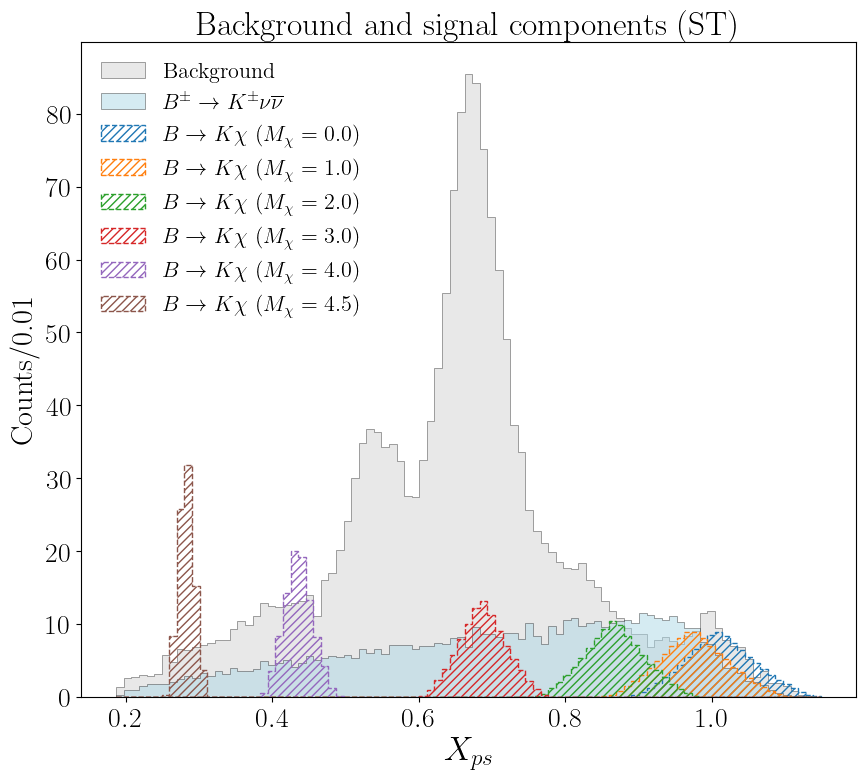

In [45]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Xps = SemilepTag_m00_df["Xps"]
SemilepTag_m10_Xps = SemilepTag_m10_df["Xps"]
SemilepTag_m20_Xps = SemilepTag_m20_df["Xps"]
SemilepTag_m30_Xps = SemilepTag_m30_df["Xps"]
SemilepTag_m40_Xps = SemilepTag_m40_df["Xps"]
SemilepTag_m45_Xps = SemilepTag_m45_df["Xps"]
Knunu = Knunu_SemilepTag_wc_df["Xps"]
#Knunu = Knunu_Semi_df["Xps"]
bkg = bkg_df["Xps"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(bkg, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(bkg) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(bkg) - np.min(bkg)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
#nbins = 80
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)

    
# Plot background and signal components
plt.hist(
    bkg,
    bins=bin_edges,
    label='Background',
    range=data_range,
    color='lightgray',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(bkg),
    histtype='stepfilled',
    linewidth=0.5
)
plt.hist(
    Knunu,
    bins=bin_edges,
    label= r'$B^{\pm} \to K^{\pm} \nu \overline{\nu}$',
    range=data_range,
    color='lightblue',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(Knunu),
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Xps),
    (1.0, SemilepTag_m10_Xps),
    (2.0, SemilepTag_m20_Xps),
    (3.0, SemilepTag_m30_Xps),
    (4.0, SemilepTag_m40_Xps),
    (4.5, SemilepTag_m45_Xps),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B \\to K \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$X_{ps}$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_width,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/XpsSemilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

31


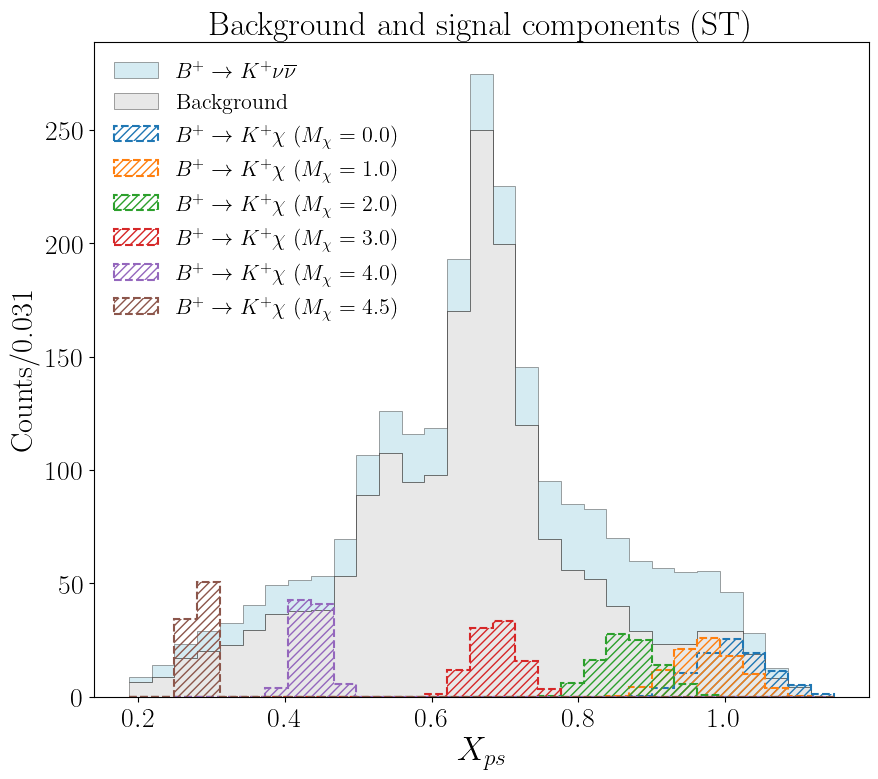

In [46]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Xps = SemilepTag_m00_df["Xps"]
SemilepTag_m10_Xps = SemilepTag_m10_df["Xps"]
SemilepTag_m20_Xps = SemilepTag_m20_df["Xps"]
SemilepTag_m30_Xps = SemilepTag_m30_df["Xps"]
SemilepTag_m40_Xps = SemilepTag_m40_df["Xps"]
SemilepTag_m45_Xps = SemilepTag_m45_df["Xps"]
Knunu = Knunu_SemilepTag_wc_df["Xps"]
#Knunu = Knunu_Semi_df["Xps"]
bkg = bkg_df["Xps"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 31
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
#bin_edge = 100
print(nbins)

    
# Plot background and signal components
plt.hist(
    [bkg, Knunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to K^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(Knunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Xps),
    (1.0, SemilepTag_m10_Xps),
    (2.0, SemilepTag_m20_Xps),
    (3.0, SemilepTag_m30_Xps),
    (4.0, SemilepTag_m40_Xps),
    (4.5, SemilepTag_m45_Xps),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to K^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$X_{ps}$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
plt.savefig(f'../Analysis/Plots/XpsSemilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

28


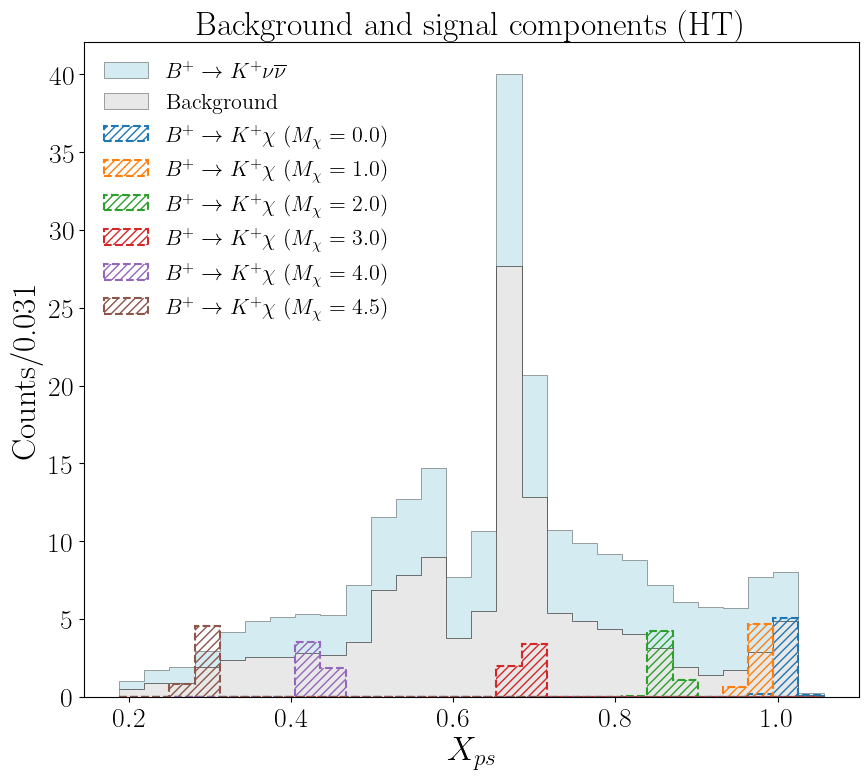

In [47]:
plt.figure(figsize=(10, 8.5))
# Extract data from pandas DataFrame
HadronicTag_m00_xps = HadronicTag_m00_df["Xps"]
HadronicTag_m10_xps = HadronicTag_m10_df["Xps"]
HadronicTag_m20_xps = HadronicTag_m20_df["Xps"]
HadronicTag_m30_xps = HadronicTag_m30_df["Xps"]
HadronicTag_m40_xps = HadronicTag_m40_df["Xps"]
HadronicTag_m45_xps = HadronicTag_m45_df["Xps"]
Knunu = Knunu_Had_df["Xps"]
bkg = bkgHad["Xps"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)


# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
factor = 0.00003
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 28
#range_limit = (0.17, 1.1)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
print(nbins)

# Plot background and signal components
plt.hist(
    [bkg, Knunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to K^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(Knunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, HadronicTag_m00_xps),
    (1.0, HadronicTag_m10_xps),
    (2.0, HadronicTag_m20_xps),
    (3.0, HadronicTag_m30_xps),
    (4.0, HadronicTag_m40_xps),
    (4.5, HadronicTag_m45_xps),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to K^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$X_{ps}$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,3)}", fontsize=24)
plt.title("Background and signal components (HT)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
plt.savefig(f'../Analysis/Plots/XpsHadronic.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

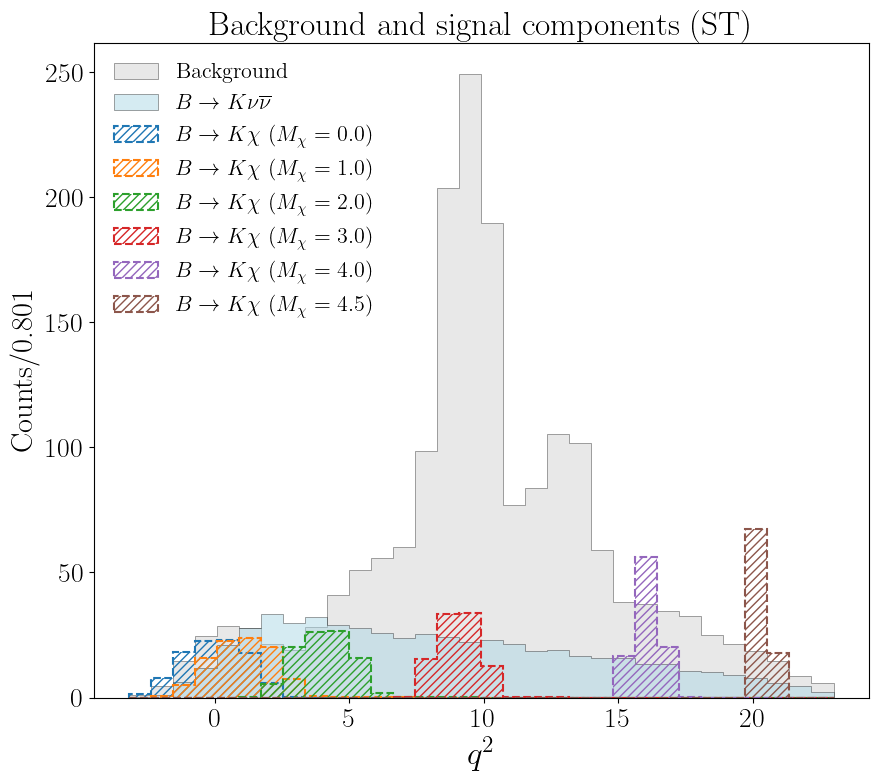

In [48]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_q2 = SemilepTag_m00_df["q2"]
SemilepTag_m10_q2 = SemilepTag_m10_df["q2"]
SemilepTag_m20_q2 = SemilepTag_m20_df["q2"]
SemilepTag_m30_q2 = SemilepTag_m30_df["q2"]
SemilepTag_m40_q2 = SemilepTag_m40_df["q2"]
SemilepTag_m45_q2 = SemilepTag_m45_df["q2"]
Knunu = Knunu_SemilepTag_wc_df["q2"]
#Knunu = Knunu_Semi_df["q2"]
bkg = bkg_df["q2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
#nbins = 80
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)

    
# Plot background and signal components
plt.hist(
    bkg,
    bins=bin_edges,
    label='Background',
    range=data_range,
    color='lightgray',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(bkg),
    histtype='stepfilled',
    linewidth=0.5
)
plt.hist(
    Knunu,
    bins=bin_edges,
    label= r'$B \to K \nu \overline{\nu}$',
    range=data_range,
    color='lightblue',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(Knunu),
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_q2),
    (1.0, SemilepTag_m10_q2),
    (2.0, SemilepTag_m20_q2),
    (3.0, SemilepTag_m30_q2),
    (4.0, SemilepTag_m40_q2),
    (4.5, SemilepTag_m45_q2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B \\to K \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$q^2$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_width,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/q2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

26


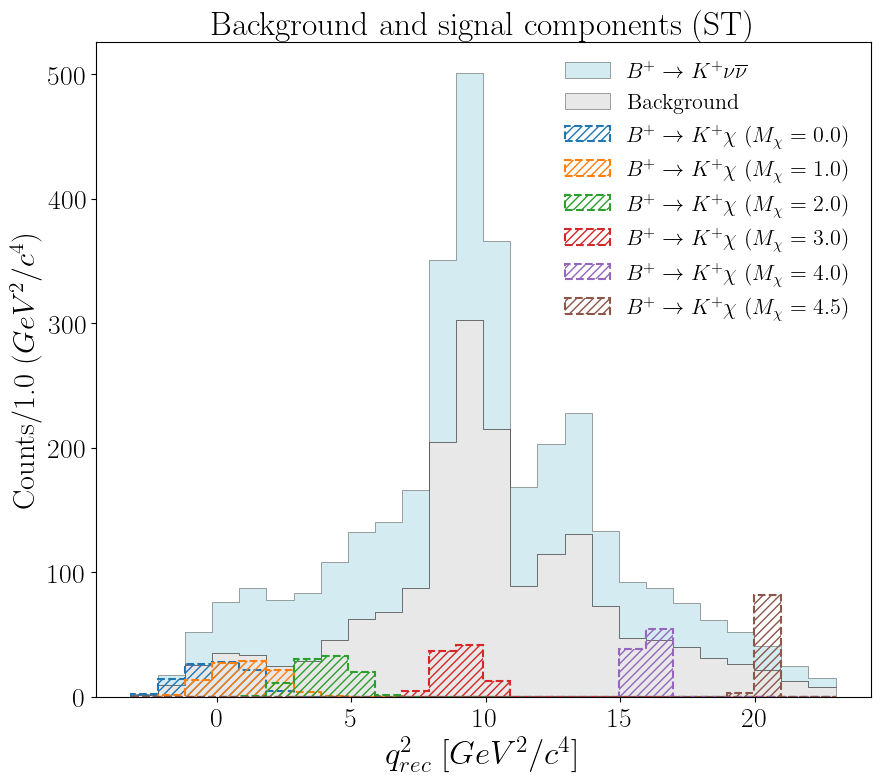

In [49]:
# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_q2 = SemilepTag_m00_df["q2"]
SemilepTag_m10_q2 = SemilepTag_m10_df["q2"]
SemilepTag_m20_q2 = SemilepTag_m20_df["q2"]
SemilepTag_m30_q2 = SemilepTag_m30_df["q2"]
SemilepTag_m40_q2 = SemilepTag_m40_df["q2"]
SemilepTag_m45_q2 = SemilepTag_m45_df["q2"]
Knunu = Knunu_Semi_df["q2"]
bkg = bkg_df["q2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 26
#range_limit = (0, 20)
#range_limit = (-3, 25)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
print(nbins)

# Plot background and signal components
plt.hist(
    [bkg, Knunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to K^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(Knunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_q2),
    (1.0, SemilepTag_m10_q2),
    (2.0, SemilepTag_m20_q2),
    (3.0, SemilepTag_m30_q2),
    (4.0, SemilepTag_m40_q2),
    (4.5, SemilepTag_m45_q2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to K^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$q^2_{rec}$ $[GeV^2/c^4]$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,1)} $(GeV^2/c^4)$", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper right', fontsize=16, frameon=False)
plt.savefig(f'../Analysis/Plots/q2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

25


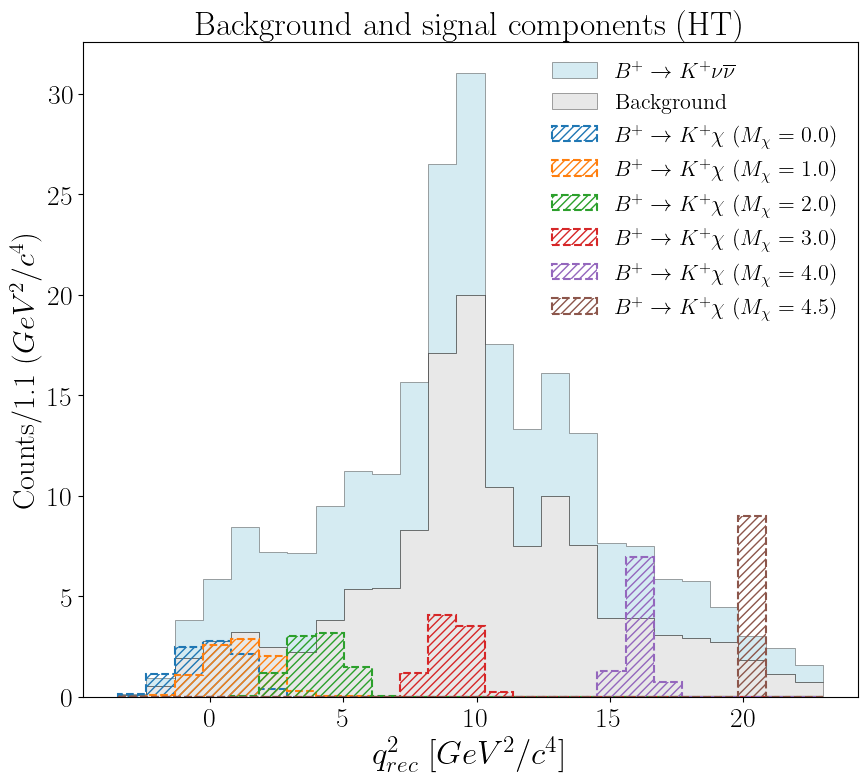

In [50]:
plt.figure(figsize=(10, 8.5))
# Extract data from pandas DataFrame
HadronicTag_m00_q2 = HadronicTag_m00_df["q2"]
HadronicTag_m10_q2 = HadronicTag_m10_df["q2"]
HadronicTag_m20_q2 = HadronicTag_m20_df["q2"]
HadronicTag_m30_q2 = HadronicTag_m30_df["q2"]
HadronicTag_m40_q2 = HadronicTag_m40_df["q2"]
HadronicTag_m45_q2 = HadronicTag_m45_df["q2"]
Knunu = Knunu_Had_df["q2"]
bkg = bkgHad["q2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
factor = 0.00005
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 25
#range_limit = (-3, 25)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
print(nbins)

# Plot background and signal components
plt.hist(
    [bkg, Knunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to K^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(Knunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, HadronicTag_m00_q2),
    (1.0, HadronicTag_m10_q2),
    (2.0, HadronicTag_m20_q2),
    (3.0, HadronicTag_m30_q2),
    (4.0, HadronicTag_m40_q2),
    (4.5, HadronicTag_m45_q2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to K^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$q^2_{rec}$ $[GeV^2/c^4]$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,1)} $(GeV^2/c^4)$", fontsize=22)
plt.title("Background and signal components (HT)")
plt.legend(loc='upper right', fontsize=16, frameon=False)
plt.savefig(f'../Analysis/Plots/q2Hadronic.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

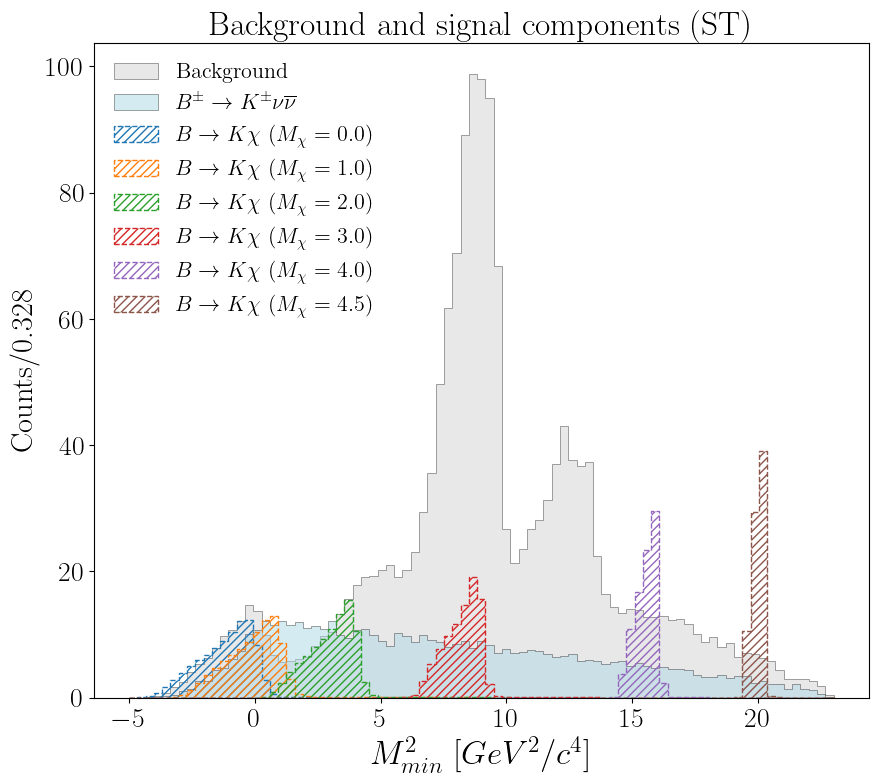

In [67]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Mmin2 = SemilepTag_m00_df["Mmin2"]
SemilepTag_m10_Mmin2 = SemilepTag_m10_df["Mmin2"]
SemilepTag_m20_Mmin2 = SemilepTag_m20_df["Mmin2"]
SemilepTag_m30_Mmin2 = SemilepTag_m30_df["Mmin2"]
SemilepTag_m40_Mmin2 = SemilepTag_m40_df["Mmin2"]
SemilepTag_m45_Mmin2 = SemilepTag_m45_df["Mmin2"]
Knunu = Knunu_SemilepTag_wc_df["Mmin2"]
#Knunu = Knunu_Semi_df["Mmin2"]
bkg = bkg_df["Mmin2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(bkg, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(bkg) ** (1/3))

# Calculate the number of bins based on the bin width
#nbins = int((np.max(bkg) - np.min(bkg)) / bin_width)
nbins = int((23 - (-5)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
#nbins = 80
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
#data_range = (np.min(bkg), np.max(bkg))
data_range = (-5.0, 23)
# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)

    
# Plot background and signal components
plt.hist(
    bkg,
    bins=bin_edges,
    label='Background',
    range=data_range,
    color='lightgray',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(bkg),
    histtype='stepfilled',
    linewidth=0.5
)
plt.hist(
    Knunu,
    bins=bin_edges,
    label= r'$B^{\pm} \to K^{\pm} \nu \overline{\nu}$',
    range=data_range,
    color='lightblue',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(Knunu),
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Mmin2),
    (1.0, SemilepTag_m10_Mmin2),
    (2.0, SemilepTag_m20_Mmin2),
    (3.0, SemilepTag_m30_Mmin2),
    (4.0, SemilepTag_m40_Mmin2),
    (4.5, SemilepTag_m45_Mmin2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B \\to K \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$M_{min}^2$ $[GeV^2/c^4]$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_width,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/Mmin2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

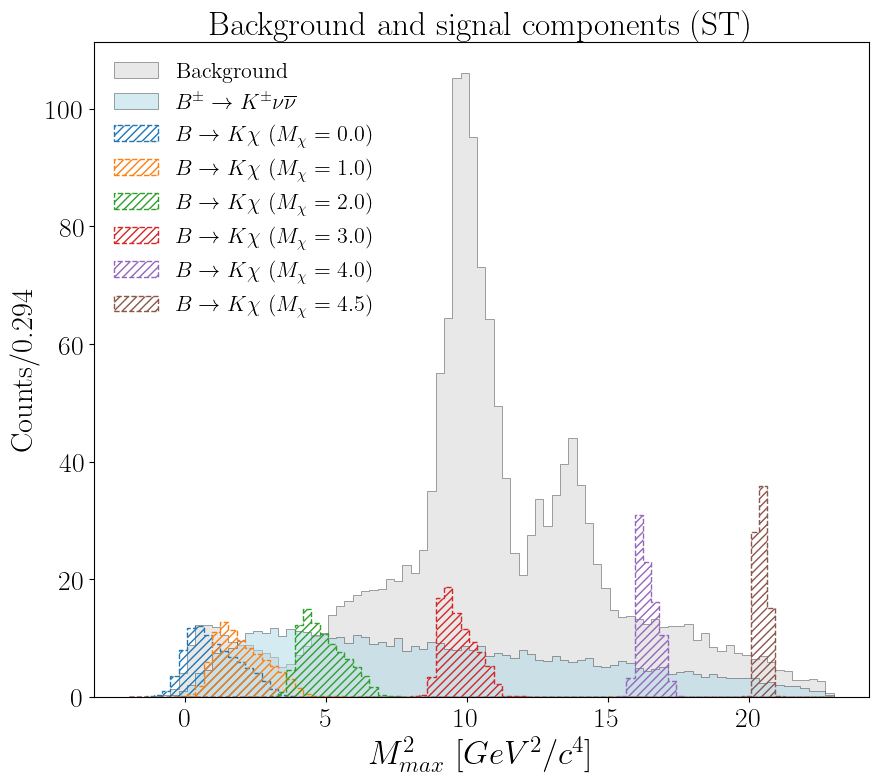

In [68]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Mmax2 = SemilepTag_m00_df["Mmax2"]
SemilepTag_m10_Mmax2 = SemilepTag_m10_df["Mmax2"]
SemilepTag_m20_Mmax2 = SemilepTag_m20_df["Mmax2"]
SemilepTag_m30_Mmax2 = SemilepTag_m30_df["Mmax2"]
SemilepTag_m40_Mmax2 = SemilepTag_m40_df["Mmax2"]
SemilepTag_m45_Mmax2 = SemilepTag_m45_df["Mmax2"]
Knunu = Knunu_SemilepTag_wc_df["Mmax2"]
#Knunu = Knunu_Semi_df["Mmax2"]
bkg = bkg_df["Mmax2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(bkg, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(bkg) ** (1/3))

# Calculate the number of bins based on the bin width
#nbins = int((np.max(bkg) - np.min(bkg)) / bin_width)
nbins = int((23 - (-2.0)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
#nbins = 80
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
#data_range = (np.min(bkg), np.max(bkg))
data_range = (-2.0, 23)

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)

    
# Plot background and signal components
plt.hist(
    bkg,
    bins=bin_edges,
    label='Background',
    range=data_range,
    color='lightgray',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(bkg),
    histtype='stepfilled',
    linewidth=0.5
)
plt.hist(
    Knunu,
    bins=bin_edges,
    label= r'$B^{\pm} \to K^{\pm} \nu \overline{\nu}$',
    range=data_range,
    color='lightblue',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(Knunu),
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Mmax2),
    (1.0, SemilepTag_m10_Mmax2),
    (2.0, SemilepTag_m20_Mmax2),
    (3.0, SemilepTag_m30_Mmax2),
    (4.0, SemilepTag_m40_Mmax2),
    (4.5, SemilepTag_m45_Mmax2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B \\to K \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$M_{max}^2$ $[GeV^2/c^4]$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_width,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/Mmax2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

31


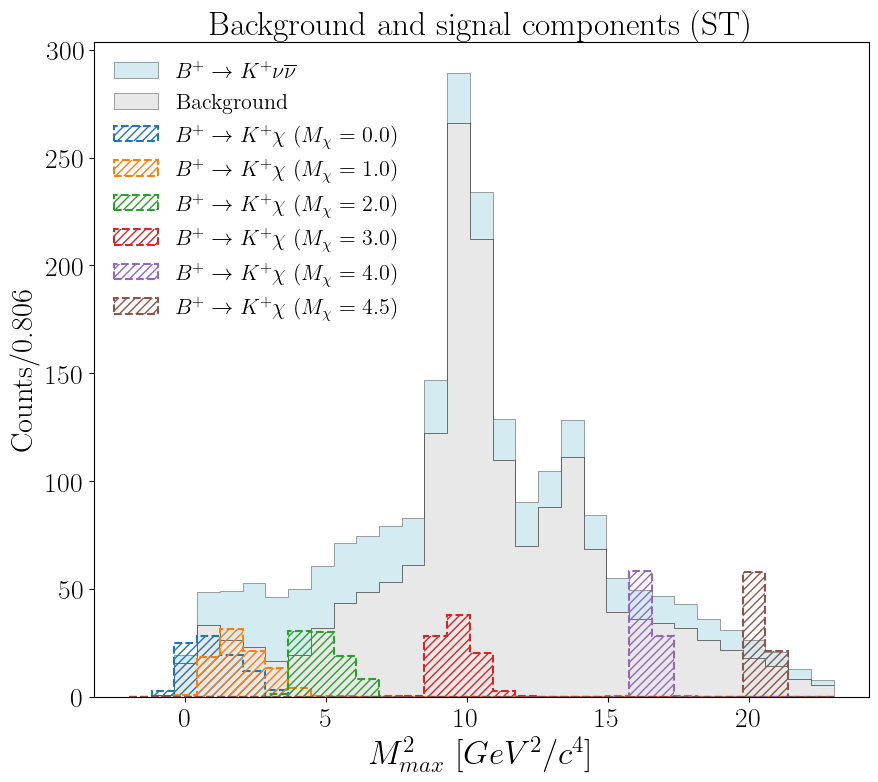

In [69]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Mmax2 = SemilepTag_m00_df["Mmax2"]
SemilepTag_m10_Mmax2 = SemilepTag_m10_df["Mmax2"]
SemilepTag_m20_Mmax2 = SemilepTag_m20_df["Mmax2"]
SemilepTag_m30_Mmax2 = SemilepTag_m30_df["Mmax2"]
SemilepTag_m40_Mmax2 = SemilepTag_m40_df["Mmax2"]
SemilepTag_m45_Mmax2 = SemilepTag_m45_df["Mmax2"]
Knunu = Knunu_SemilepTag_wc_df["Mmax2"]
#Knunu = Knunu_Semi_df["Mmax2"]
bkg = bkg_df["Mmax2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 31
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
#data_range = (np.min(bkg), np.max(bkg))
data_range = (-2.0, 23)

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
#bin_edge = 100
print(nbins)

    
# Plot background and signal components
plt.hist(
    [bkg, Knunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to K^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(Knunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Mmax2),
    (1.0, SemilepTag_m10_Mmax2),
    (2.0, SemilepTag_m20_Mmax2),
    (3.0, SemilepTag_m30_Mmax2),
    (4.0, SemilepTag_m40_Mmax2),
    (4.5, SemilepTag_m45_Mmax2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to K^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$M_{max}^2$ $[GeV^2/c^4]$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
plt.savefig(f'../Analysis/Plots/Mmax2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

31


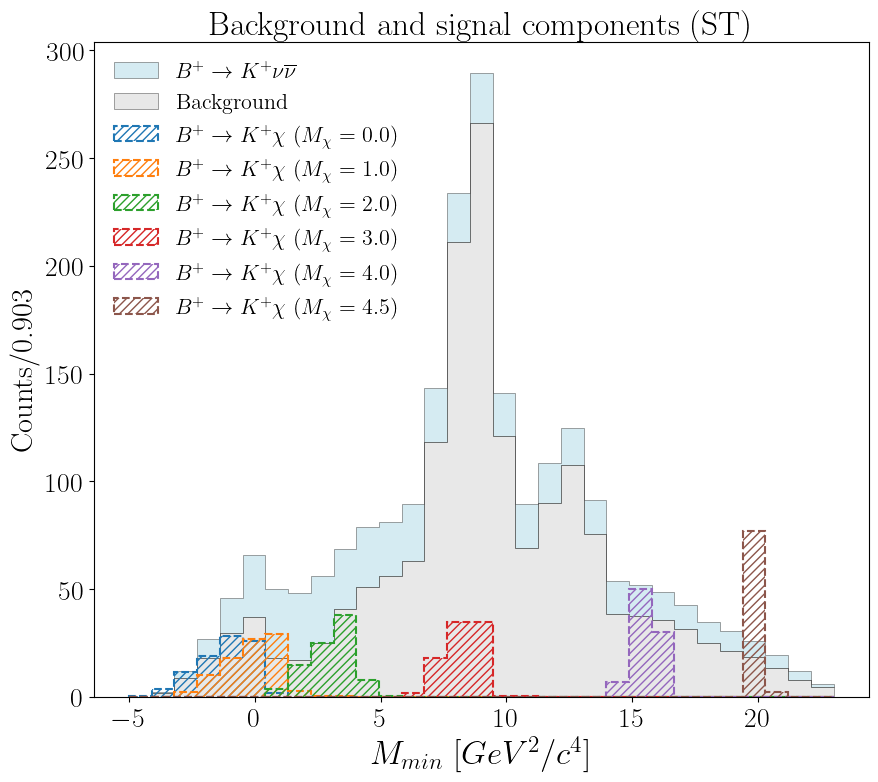

In [70]:

# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Mmin2 = SemilepTag_m00_df["Mmin2"]
SemilepTag_m10_Mmin2 = SemilepTag_m10_df["Mmin2"]
SemilepTag_m20_Mmin2 = SemilepTag_m20_df["Mmin2"]
SemilepTag_m30_Mmin2 = SemilepTag_m30_df["Mmin2"]
SemilepTag_m40_Mmin2 = SemilepTag_m40_df["Mmin2"]
SemilepTag_m45_Mmin2 = SemilepTag_m45_df["Mmin2"]
Knunu = Knunu_SemilepTag_wc_df["Mmin2"]
#Knunu = Knunu_Semi_df["Mmin2"]
bkg = bkg_df["Mmin2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(Knunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(Knunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(Knunu) - np.min(Knunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 1.08e6
Lumi = 50000
#Lumi = 362
factor = 0.0005
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 31
#range_limit = (0.17, 1.17)

# Determine the range for the histograms based on your data
#data_range = (np.min(bkg), np.max(bkg))
data_range = (-5.0, 23)

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
#bin_edge = 100
print(nbins)

    
# Plot background and signal components
plt.hist(
    [bkg, Knunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to K^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(Knunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Mmin2),
    (1.0, SemilepTag_m10_Mmin2),
    (2.0, SemilepTag_m20_Mmin2),
    (3.0, SemilepTag_m30_Mmin2),
    (4.0, SemilepTag_m40_Mmin2),
    (4.5, SemilepTag_m45_Mmin2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to K^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$M_{min}$ $[GeV^2/c^4]$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
plt.savefig(f'../Analysis/Plots/Mmin2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()